# Session 6: Bayesian Regression

### Neil D. Lawrence

In [1]:
import pods
import mlai
import numpy as np
import matplotlib.pyplot as plt
import teaching_plots as plot
%matplotlib inline


### Two Simultaneous Equations

A system of two simultaneous equations with two
unknowns.

How do we deal with three simultaneous
equations with only two unknowns?

$$\begin{aligned}
        y_1 = & mx_1 + c\\
        y_2 = & mx_2 + c
      \end{aligned}$$ 
      
$$\begin{aligned}
        y_1-y_2 = & m(x_1 - x_2)
      \end{aligned}$$  
      
$$\begin{aligned}
        \frac{y_1-y_2}{x_1 - x_2} = & m
      \end{aligned}$$ 
      
$$\begin{aligned}
        m & =\frac{y_2-y_1}{x_2 - x_1}\\
        c & = y_1 - m x_1
      \end{aligned}$$ 
      
$$\begin{aligned}
        y_1 = & mx_1 + c\\
        y_2 = & mx_2 + c\\
        y_3 = & mx_3 + c
      \end{aligned}$$

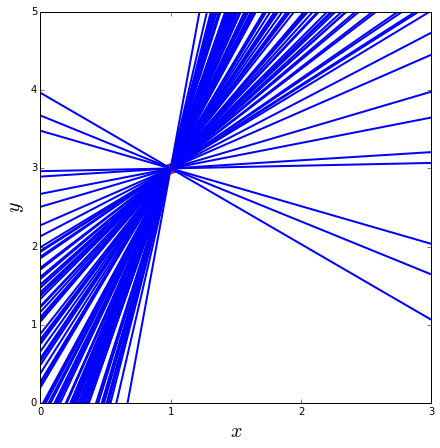

In [2]:
plot.under_determined_system()

### Underdetermined System
- What about two unknowns and *one* observation?
    $$y_1 =  mx_1 + c$$

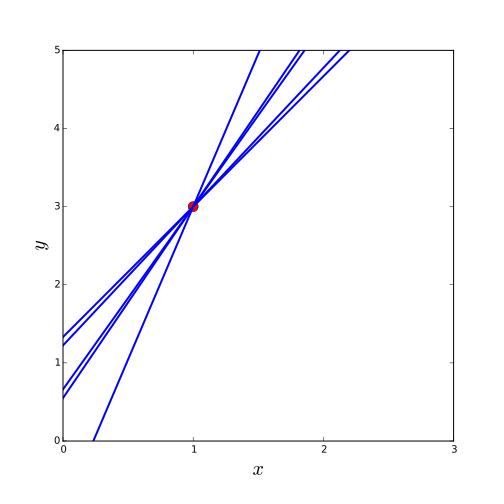

In [3]:
pods.notebook.display_plots('under_determined_system{samp:0>3}.svg', directory='./diagrams', samp=(0, 10))

### Underdetermined System
- Can compute $m$ given $c$.
$$m = \frac{y_1 -c}{x}$$

### Underdetermined System

- Can compute $m$ given $c$.

Assume 
$$c \sim \mathcal{N}(0, 4),$$

### Overdetermined System

-   With two unknowns and two observations: 
    $$\begin{aligned}
          y_1 = & mx_1 + c\\
          y_2 = & mx_2 + c
        \end{aligned}$$

-   Additional observation leads to *overdetermined* system.
    $$y_3 =  mx_3 + c$$

-   This problem is solved through a noise model
    $\epsilon \sim \mathcal{N}(0,\sigma^2)$ $$\begin{aligned}
          y_1 = mx_1 + c + \epsilon_1\\
          y_2 = mx_2 + c + \epsilon_2\\
          y_3 = mx_3 + c + \epsilon_3
        \end{aligned}$$

### Noise Models

-   We aren’t modeling entire system.

-   Noise model gives mismatch between model and data.

-   Gaussian model justified by appeal to central limit theorem.

-   Other models also possible (Student-$t$ for heavy tails).

-   Maximum likelihood with Gaussian noise leads to *least squares*.

### Different Types of Uncertainty

-   The first type of uncertainty we are assuming is
    *aleatoric* uncertainty.

-   The second type of uncertainty we are assuming is
    *epistemic* uncertainty.

### Aleatoric Uncertainty

-   This is uncertainty we couldn’t know even if we wanted to. e.g. the
    result of a football match before it’s played.

-   Where a sheet of paper might land on the floor.

### Epistemic Uncertainty

-   This is uncertainty we could in principal know the answer too. We
    just haven’t observed enough yet, e.g. the result of a football
    match *after* it’s played.

-   What colour socks your lecturer is wearing.

### Reading

-   @Bishop:book06 Section 1.2.3 (pg 21–24).

-   @Bishop:book06 Section 1.2.6 (start from just past eq 1.64
    pg 30-32).

-   @Rogers:book11 use an example of a coin toss for introducing
    Bayesian inference Chapter 3, Sections 3.1-3.4 (pg 95-117). Although
    you also need the beta density which we haven’t yet discussed. This
    is also the example that @Laplace:memoire74 used.

<!-- -->

-   Bayesian Inference

    -   @Rogers:book11 use an example of a coin toss for introducing
        Bayesian inference Chapter 3, Sections 3.1-3.4 (pg 95-117).
        Although you also need the beta density which we haven’t
        yet discussed. This is also the example that
        @Laplace:memoire74 used.

    -   @Bishop:book06 Section 1.2.3 (pg 21–24).

    -   @Bishop:book06 Section 1.2.6 (start from just past eq 1.64
        pg 30-32).

### Prior Distribution

-   Bayesian inference requires a prior on the parameters.

-   The prior represents your belief *before* you see the data of the
    likely value of the parameters.

-   For linear regression, consider a Gaussian prior on the intercept:
    $$c \sim \mathcal{N}(0, \alpha_1)$$

### Posterior Distribution

-   Posterior distribution is found by combining the prior with
    the likelihood.

-   Posterior distribution is your belief *after* you see the data of
    the likely value of the parameters.

-   The posterior is found through **Bayes’ Rule**
    $$p(c|y) = \frac{p(y|c)p(c)}{p(y)}$$


### Bayes Update

/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


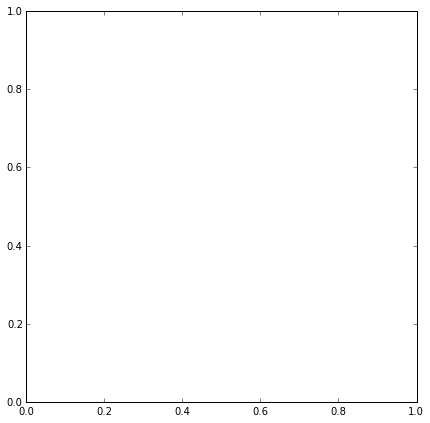

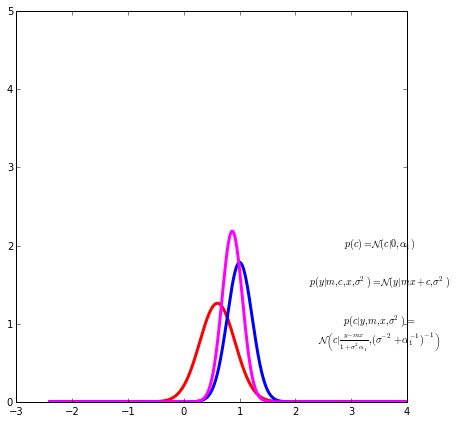

In [4]:
plot.bayes_update()

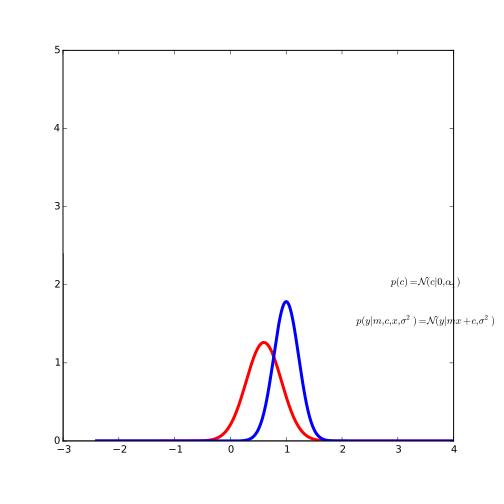

In [5]:
pods.notebook.display_plots('dem_gaussian{stage:0>2}.svg', './diagrams/', stage=(1, 3))

### Stages to Derivation of the Posterior

-   Multiply likelihood by prior

    -   they are "exponentiated quadratics", the answer is always also
        an exponentiated quadratic because
        $$\exp(a^2)\exp(b^2) = \exp(a^2 + b^2)$$

-   Complete the square to get the resulting density in the form of
    a Gaussian.

-   Recognise the mean and (co)variance of the Gaussian. This is the
    estimate of the posterior.

### Main Trick

$$p(c) = \frac{1}{\sqrt{2\pi\alpha_1}} \exp\left(-\frac{1}{2\alpha_1}c^2\right)$$
$$p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2) = \frac{1}{\left(2\pi\sigma^2\right)^{\frac{n}{2}}} \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - mx_i - c)^2\right)$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) = \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{p(\mathbf{y}|\mathbf{x}, m, \sigma^2)}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) =  \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{\int p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c) \text{d} c}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) \propto  p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)$$

$$\begin{aligned}
    \log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) =&-\frac{1}{2\sigma^2} \sum_{i=1}^n(y_i-c - mx_i)^2-\frac{1}{2\alpha_1} c^2 + \text{const}\\
     = &-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-mx_i)^2 -\left(\frac{n}{2\sigma^2} + \frac{1}{2\alpha_1}\right)c^2\\
    & + c\frac{\sum_{i=1}^n(y_i-mx_i)}{\sigma^2},
  \end{aligned}$$

complete the square of the quadratic form to obtain
$$\log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) = -\frac{1}{2\tau^2}(c - \mu)^2 +\text{const},$$
where $\tau^2 = \left(n\sigma^{-2} +\alpha_1^{-1}\right)^{-1}$
and
$\mu = \frac{\tau^2}{\sigma^2} \sum_{i=1}^n(y_i-mx_i)$.

### The Joint Density

-   Really want to know the *joint* posterior density over the
    parameters $c$ *and* $m$.

-   Could now integrate out over $m$, but it’s easier to consider the
    multivariate case.

### Height and Weight Models

/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


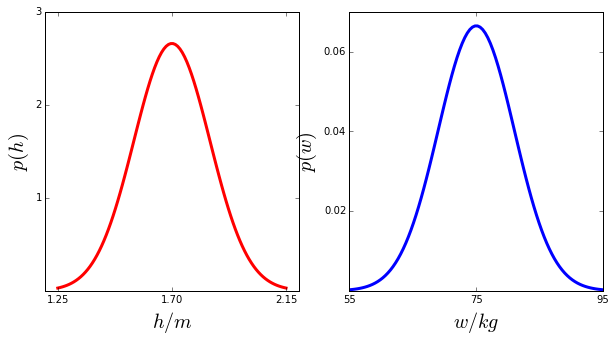

In [6]:
plot.height_weight()


![](./diagrams/height_weight_gaussian.svg)

###  Sampling Two Dimensional Variables

/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


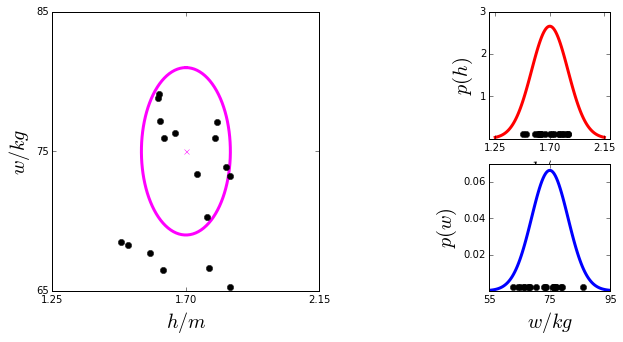

In [7]:
plot.independent_height_weight()

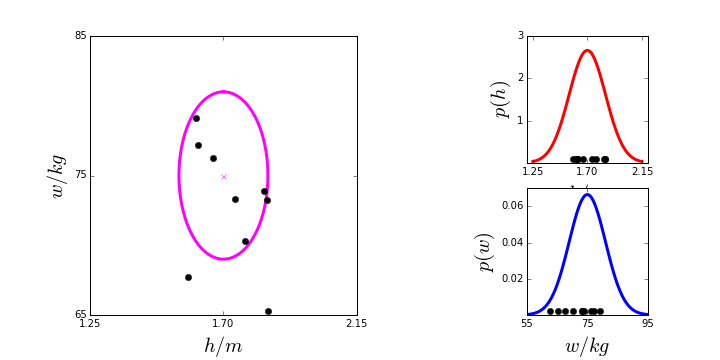

In [8]:
pods.notebook.display_plots('independent_height_weight{fig:0>3}.png', './diagrams/', fig=(0, 79))


### Independence Assumption

- This assumes height and weight are independent.
    $$
    p(h, w) = p(h)p(w)
    $$
- In reality they are dependent (body mass index) $= \frac{w}{h^2}$.


### Sampling Two Dimensional Variables


/Users/neil/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


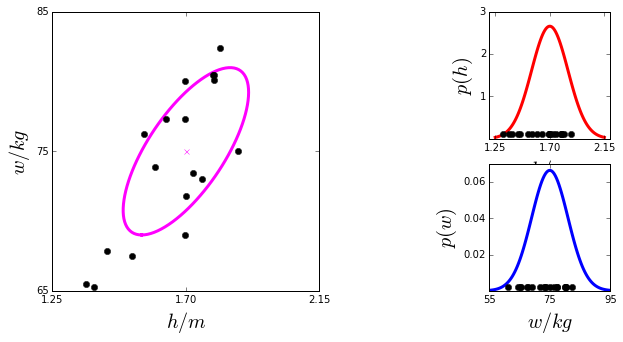

In [9]:
plot.correlated_height_weight()

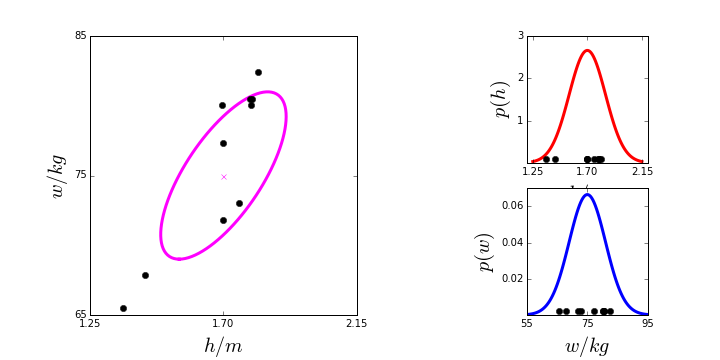

In [10]:
pods.notebook.display_plots('correlated_height_weight{fig:0>3}.png', './diagrams/', fig=(0, 79))

### Independent Gaussians

$$p(w, h) = p(w)p(h)$$ 
$$p(w, h) = \frac{1}{\sqrt{2\pi \sigma_1^2}\sqrt{2\pi\sigma_2^2}} \exp\left(-\frac{1}{2}\left(\frac{(w-\mu_1)^2}{\sigma_1^2} + \frac{(h-\mu_2)^2}{\sigma_2^2}\right)\right)$$

### Independent Gaussians
$$p(w, h) = \frac{1}{\sqrt{2\pi\sigma_1^2 2\pi\sigma_2^2}} \exp\left(-\frac{1}{2}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\mu_1 \\ \mu_2\end{bmatrix}\right)^\top\begin{bmatrix}\sigma_1^2& 0\\0&\sigma_2^2\end{bmatrix}^{-1}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\mu_1 \\ \mu_2\end{bmatrix}\right)\right)$$

### Independent Gaussians
$$p(\mathbf{y}) = \frac{1}{\left|2\pi \mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{D}^{-1}(\mathbf{y} - \boldsymbol{\mu})\right)$$

### Correlated Gaussian

Form correlated from original by rotating the data space using matrix
$\mathbf{R}$.


$$p(\mathbf{y}) = \frac{1}{\left|2\pi\mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{D}^{-1}(\mathbf{y} - \boldsymbol{\mu})\right)$$

### Correlated Gaussian

$$p(\mathbf{y}) = \frac{1}{\left|2\pi\mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{R}^\top\mathbf{y} - \mathbf{R}^\top\boldsymbol{\mu})^\top\mathbf{D}^{-1}(\mathbf{R}^\top\mathbf{y} - \mathbf{R}^\top\boldsymbol{\mu})\right)$$

### Correlated Gaussian

$$p(\mathbf{y}) = \frac{1}{\left|2\pi\mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{R}\mathbf{D}^{-1}\mathbf{R}^\top(\mathbf{y} - \boldsymbol{\mu})\right)$$
this gives a covariance matrix:
$$\mathbf{C}^{-1} = \mathbf{R} \mathbf{D}^{-1} \mathbf{R}^\top$$

### Correlated Gaussian

$$p(\mathbf{y}) = \frac{1}{\left|{2\pi\mathbf{C}}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{C}^{-1} (\mathbf{y} - \boldsymbol{\mu})\right)$$
this gives a covariance matrix:
$$\mathbf{C} = \mathbf{R} \mathbf{D} \mathbf{R}^\top$$

### Reading

-   Section 2.3 of @Bishop:book06 up to top of pg 85
    (multivariate Gaussians).

-   Section 3.3 of @Bishop:book06 up to 159 (pg 152–159).

### Revisit Olympics Data

-   Use Bayesian approach on olympics data with polynomials.

-   Choose a prior
    $\mathbf{w} \sim \mathcal{N}(\mathbf{0},\alpha \mathbf{I})$ with
    $\alpha = 1$.

-   Choose noise variance $\sigma^2 = 0.01$

### Sampling the Prior

-   Always useful to perform a ‘sanity check’ and sample from the prior
    before observing the data.

-   Since $\mathbf{y} = \boldsymbol{\Phi} \mathbf{w} + \boldsymbol{\epsilon}$
    just need to sample $$w \sim \mathcal{N}(0,\alpha)$$
    $$\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0},\sigma^2)$$ with
    $\alpha=1$ and $\sigma^2 = 0.01$.

In [11]:
import mlai
import pods
import numpy as np
import matplotlib.pyplot as plt

basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']
num_data = x.shape[0]

data_limits = [1892, 2020]

max_basis = y.shape[0]

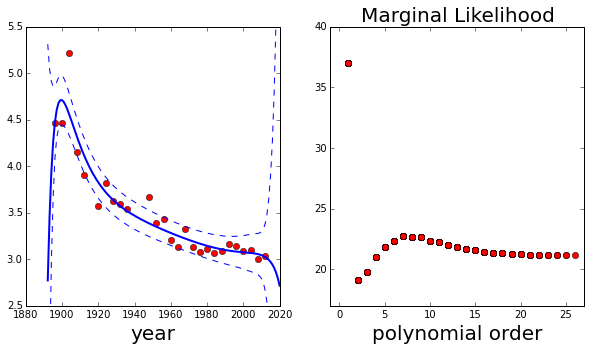

In [12]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(1,max_basis+1):
    
    model= mlai.BLM(x, y, alpha=1, sigma2=0.04, 
                    basis=basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[num_basis-1] = model.objective()/num_data 
    ll[num_basis-1] = model.log_likelihood()
    plot.marathon_fit(model=model, data_limits=data_limits, 
                           objective=-ll, objective_ylim=[17, 40], 
                           title='Marginal Likelihood',
                           fig=f, ax=ax)

### Olympic Data with Bayesian Polynomials

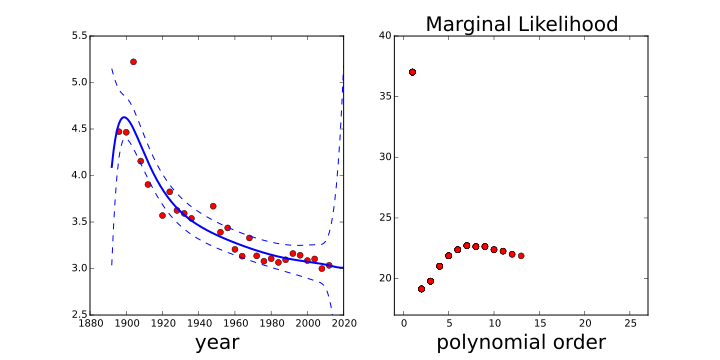

In [13]:
pods.notebook.display_plots('olympic_BLM_polynomial{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

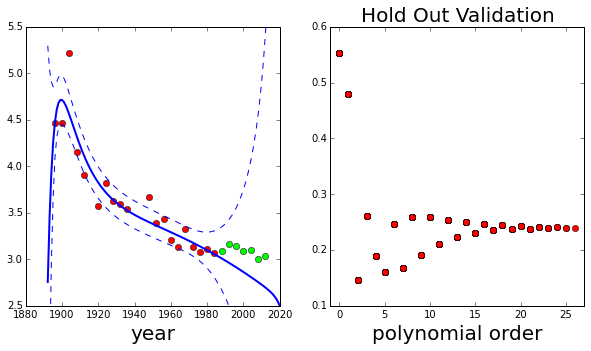

In [14]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

# Set up the validation set
val_start = 20;
x = data['X'][:val_start, :]
x_val = data['X'][val_start:, :]
y = data['Y'][:val_start, :]
y_val = data['Y'][val_start:, :]
num_val_data = x_val.shape[0]

ll = np.array([np.nan]*(max_basis))
ss = np.array([np.nan]*(max_basis))
ss_val = np.array([np.nan]*(max_basis))
for num_basis in range(1,max_basis+1):
    
    model= mlai.BLM(x, y, basis=basis, num_basis=num_basis, alpha=1, sigma2=0.04, data_limits=data_limits)
    model.fit()
    ss[num_basis-1] = model.objective()
    f_val, _ = model.predict(x_val)
    ss_val[num_basis-1] = ((y_val-f_val)**2).mean() 
    ll[num_basis-1] = model.log_likelihood()
    plot.marathon_fit(model=model, data_limits=data_limits, 
                           objective=np.sqrt(ss_val), objective_ylim=[0.1, 0.6],
                           fig=f, ax=ax, prefix='olympic_val',
                           title='Hold Out Validation',
                           x_val=x_val, y_val=y_val)

### Hold Out Validation

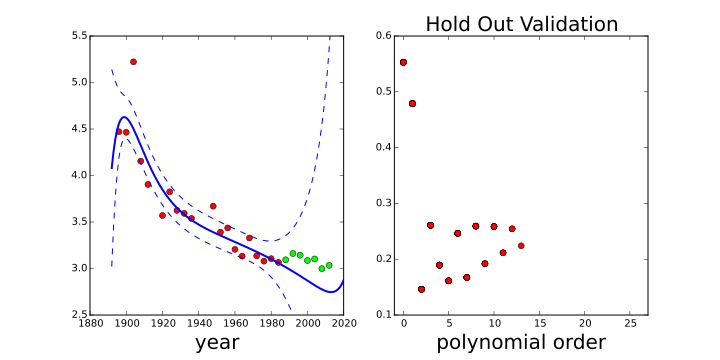

In [15]:
import pods
pods.notebook.display_plots('olympic_val_BLM_polynomial{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, 27))

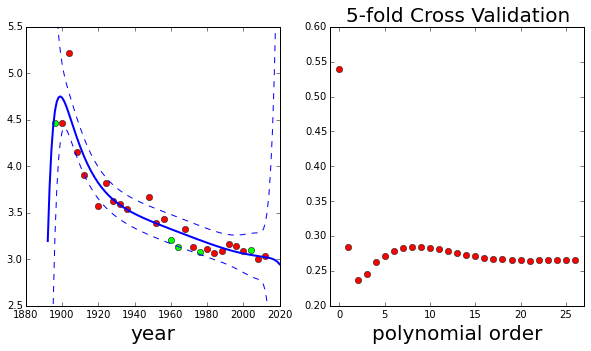

In [16]:
f, ax = plt.subplots(1, 2, figsize=(10,5))

num_parts = 5
partitions = []
ind = list(np.random.permutation(num_data))
start = 0
for part in range(num_parts):
    end = round((float(num_data)/num_parts)*(part+1))
    train_ind = ind[:start]
    train_ind.extend(ind[end:])
    val_ind = ind[start:end]
    partitions.append((train_ind, val_ind))
    start = end   

ll = np.array([np.nan]*(max_basis))
ss = np.array([np.nan]*(max_basis))
ss_val = np.array([np.nan]*(max_basis))
for num_basis in range(1,max_basis+1):
    ss_val_temp = 0.
    for part, (train_ind, val_ind) in enumerate(partitions):
        x = data['X'][train_ind, :]
        x_val = data['X'][val_ind, :]
        y = data['Y'][train_ind, :]
        y_val = data['Y'][val_ind, :]
        num_val_data = x_val.shape[0]

        model= mlai.BLM(x, y, alpha=1, sigma2=0.04, basis=basis, num_basis=num_basis, data_limits=data_limits)
        model.fit()
        ss[num_basis-1] = model.objective()
        f_val, _ = model.predict(x_val)
        ss_val_temp += ((y_val-f_val)**2).mean() 
        plot.marathon_fit(model=model, data_limits=data_limits, 
                                objective=np.sqrt(ss_val), objective_ylim=[0.2,0.6],
                                fig=f, ax=ax, prefix='olympic_' + str(num_parts) + 'cv' + str(part) + '_inter',
                                title='5-fold Cross Validation',
                                x_val=x_val, y_val=y_val)
    ss_val[num_basis-1] = ss_val_temp/(num_parts)
    ax[1].cla()
    plot.marathon_fit(model=model, data_limits=data_limits, 
                            objective=np.sqrt(ss_val), objective_ylim=[0.2,0.6],
                            fig=f, ax=ax, prefix='olympic_' + str(num_parts) + 'cv5_inter',
                            title='5-fold Cross Validation',
                            x_val=x_val, y_val=y_val)

### 5-fold Cross Validation

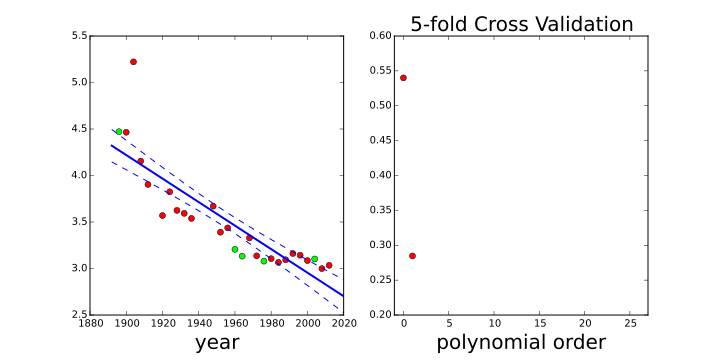

In [17]:
pods.notebook.display_plots('olympic_5cv{part}_inter_BLM_polynomial{num_basis:0>3}.svg', 
                            directory='./diagrams', part=(0, 5), num_basis=(1, max_basis))

### Model Fit

-   Marginal likelihood doesn’t always increase as model
    order increases.

-   Bayesian model always has 2 parameters, regardless of how many basis
    functions (and here we didn’t even fit them).

-   Maximum likelihood model over fits through increasing number
    of parameters.

-   Revisit maximum likelihood solution with validation set.

### Regularized Mean

-   Validation fit here based on mean solution for
    $\mathbf{w}$ only.

-   For Bayesian solution
    $$\boldsymbol{\mu}_w = \left[\sigma^{-2}\boldsymbol{\Phi}^\top\boldsymbol{\Phi} + \alpha^{-1}\mathbf{I}\right]^{-1} \sigma^{-2} \boldsymbol{\Phi}^\top \mathbf{y}$$
    instead of
    $$\mathbf{w}^* = \left[\boldsymbol{\Phi}^\top\boldsymbol{\Phi}\right]^{-1} \boldsymbol{\Phi}^\top \mathbf{y}$$

-   Two are equivalent when $\alpha \rightarrow \infty$.

-   Equivalent to a prior for $\mathbf{w}$ with infinite variance.

-   In other cases $\alpha \mathbf{I}$ *regularizes* the system (keeps
    parameters smaller).

### Sampling the Posterior

-   Now check samples by extracting $\mathbf{w}$ from the
    *posterior*.

-   Now for $\mathbf{y} = \boldsymbol{\Phi} \mathbf{w} + \boldsymbol{\epsilon}$
    need
    $$w \sim \mathcal{N}(\boldsymbol{\mu}_w,\mathbf{C}_w)$$
    with
    $\mathbf{C}_w = \left[\sigma^{-2}\boldsymbol{\Phi}^\top \boldsymbol{\Phi} + \alpha^{-1} \mathbf{I}\right]^{-1}$
    and
    $\boldsymbol{\mu}_w =\mathbf{C}_w \sigma^{-2} \boldsymbol{\Phi}^\top \mathbf{y}$
    $$\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0},\sigma^2\mathbf{I})$$ with
    $\alpha=1$ and $\sigma^2 = 0.01$.

### Marginal Likelihood

-   The marginal likelihood can also be computed, it has the form:
    $$p(\mathbf{y}|\mathbf{X}, \sigma^2, \alpha) = \frac{1}{(2\pi)^\frac{n}{2}\left|\mathbf{K}\right|^\frac{1}{2}} \exp\left(-\frac{1}{2} \mathbf{y}^\top \mathbf{K}^{-1} \mathbf{y}\right)$$
    where
    $\mathbf{K} = \alpha \boldsymbol{\Phi}\boldsymbol{\Phi}^\top + \sigma^2 \mathbf{I}$.

-   So it is a zero mean $n$-dimensional Gaussian with covariance
    matrix $\mathbf{K}$.

### Computing the Expected Output

-   Given the posterior for the parameters, how can we compute the
    expected output at a given location?

-   Output of model at location $\mathbf{x}_i$ is given by
    $$f(\mathbf{x}_i; \mathbf{w}) = \boldsymbol{\phi}_i^\top \mathbf{w}$$

-   We want the expected output under the posterior density,
    $p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)$.

-   Mean of mapping function will be given by $$\begin{aligned}
          \left\langle f(\mathbf{x}_i; \mathbf{w})\right\rangle_{p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)} &= \boldsymbol{\phi}_i^\top \left\langle\mathbf{w}\right\rangle_{p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)} \\
          & = \boldsymbol{\phi}_i^\top \boldsymbol{\mu}_w
        \end{aligned}$$

### Variance of Expected Output

-   Variance of model at location $\mathbf{x}_i$ is given by
    $$\begin{aligned}
          \text{var}(f(\mathbf{x}_i; \mathbf{w})) &= \left\langle(f(\mathbf{x}_i; \mathbf{w}))^2\right\rangle - \left\langle f(\mathbf{x}_i; \mathbf{w})\right\rangle^2 \\&= \boldsymbol{\phi}_i^\top \left\langle\mathbf{w}\mathbf{w}^\top\right\rangle \boldsymbol{\phi}_i - \boldsymbol{\phi}_i^\top \left\langle\mathbf{w}\right\rangle\left\langle\mathbf{w}\right\rangle^\top \boldsymbol{\phi}_i \\&= \boldsymbol{\phi}_i^\top \mathbf{C}_i\boldsymbol{\phi}_i
        \end{aligned}$$ where all these expectations are taken under the
    posterior density,
    $p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)$.

### Reading

-   Section 3.7–3.8 of @Rogers:book11 (pg 122–133).

-   Section 3.4 of @Bishop:book06 (pg 161–165).